In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import copy
import time
from PIL import Image
from tqdm import tqdm_notebook

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

In [2]:
model = models.resnet18(pretrained=True)

c:\Users\AZubochenko\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\AZubochenko\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
resnet_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

# resnet_transforms = models.ResNet18_Weights.IMAGENET1K_V1.transforms()

In [5]:
from PIL import Image

image = Image.open(r'doggy.jpg')

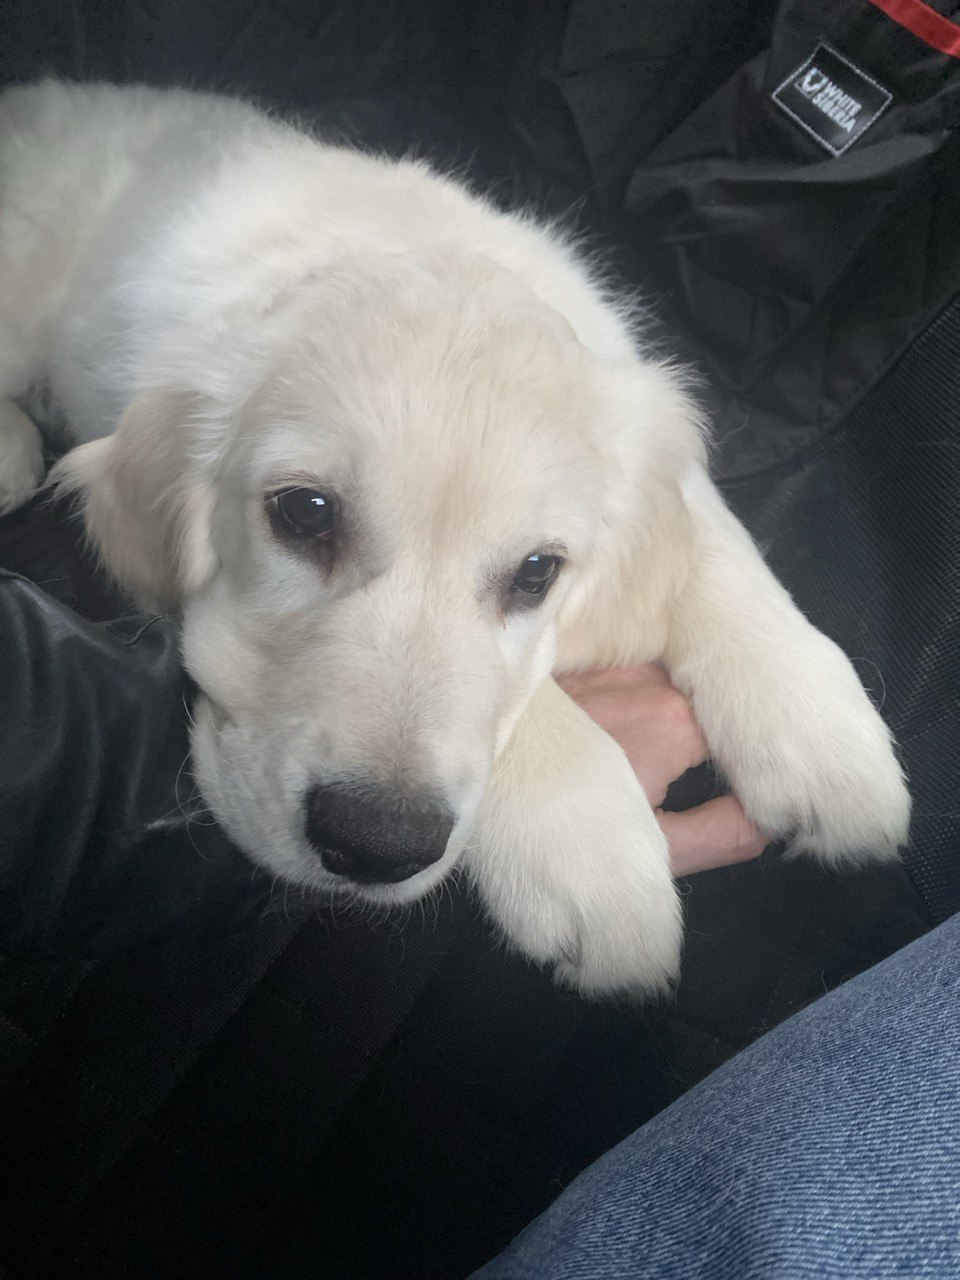

In [6]:
image

In [7]:
image_transformed = resnet_transforms(image)
print(image_transformed.shape)

torch.Size([3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.2216995].


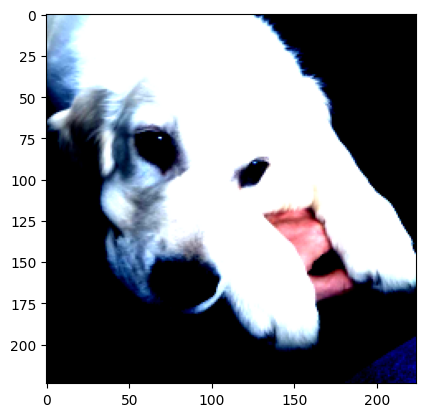

In [8]:
plt.imshow(image_transformed.permute(1,2,0).data.cpu().numpy())

In [9]:
model.eval()

model_output = model(image_transformed.reshape((1, 3, 224, 224)))
model_output

tensor([[-2.9229e-01,  6.6852e-01, -5.4090e-01, -2.6253e+00, -7.5578e-01,
          1.2327e+00, -9.8339e-01, -2.1663e+00, -1.5782e+00, -3.5870e+00,
         -5.6433e+00, -3.5548e+00, -6.0736e+00, -5.7298e+00, -2.2356e+00,
         -7.5648e+00, -5.6364e+00, -4.6906e-01, -2.0460e+00, -1.5823e+00,
         -3.8772e+00, -5.1369e+00, -3.0047e+00, -5.0085e-01, -1.0768e+00,
          1.1006e-01, -3.2082e+00, -3.1690e+00, -1.2892e+00,  1.0019e+00,
         -2.6160e+00, -3.5526e-01, -1.8465e+00,  2.0039e-02,  1.5570e+00,
         -1.2680e+00, -1.1504e+00, -1.3617e+00, -3.1457e+00, -2.4340e+00,
         -2.1623e+00, -1.6523e+00, -3.1310e+00, -4.7381e+00, -2.1718e+00,
         -7.6916e-01, -7.5510e-01, -1.1720e+00,  8.9011e-02, -3.4706e+00,
          1.1341e+00, -5.9699e-01, -1.5511e+00, -2.6652e+00, -3.2849e+00,
         -1.1579e+00, -1.5129e+00, -5.0811e+00, -3.8807e+00, -2.2629e+00,
         -1.3981e+00, -1.7729e+00, -3.5768e+00, -4.5521e+00, -1.0066e+00,
         -2.2622e+00, -4.0113e+00, -1.

In [10]:
np.argmax(model_output.data.cpu().numpy())

np.int64(207)

In [11]:
resnet_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

In [13]:
train_data = datasets.ImageFolder(r'dogs\dogs\train', transform = resnet_transforms)
test_data = datasets.ImageFolder(r'dogs\dogs\test', transform = resnet_transforms)
val_data = datasets.ImageFolder(r'dogs\dogs\valid', transform = resnet_transforms)

In [14]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)

In [16]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [17]:
model.fc = nn.Linear(512, 70)

In [18]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [21]:
len(list(model.children()))

10

In [22]:
for i, layer in enumerate(model.children()):
    if i < 9:
        for param in layer.parameters():
            param.requires_grad = False

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [24]:
device

device(type='cuda')

In [25]:
model = model.to(device)

In [26]:
loss_fn = torch.nn.CrossEntropyLoss()
lr = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [27]:
# pip install tensorboard

In [28]:
import os

if not os.path.exists('logs'):
    os.mkdir('logs')

In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('logs')

#В терминале: tensorboard --logdir=./transfer_learning/logs

In [30]:
def evaluate(model, loss_fn, dataloader):
    losses = []
    num_correct = 0
    num_samples = 0

    model.eval()

    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            logits = model(X_batch)
            loss = loss_fn(logits, y_batch)
            losses.append(loss.item())

            y_pred = torch.argmax(logits, dim=1)
            num_correct += (y_pred == y_batch).sum().item()
            num_samples += y_batch.size(0)

    accuracy = num_correct/num_samples
    return accuracy, np.mean(losses)

def train(model, loss_fn, optimizer, n_epoch=3):

    num_iter = 0
    
    for epoch in range(n_epoch):

        print("Epoch:", epoch)

        model.train(True)
        
        for i, batch in enumerate(train_loader):
            X_batch, y_batch = batch 
            
            X_batch = X_batch.to(device)
            logits = model(X_batch) 
            
            y_batch = y_batch.to(device)
            loss = loss_fn(logits, y_batch) 
            
            
            loss.backward() 
            optimizer.step() 
            optimizer.zero_grad() 


            num_iter += 1
            writer.add_scalar('Loss/train', loss.item(), num_iter)

            model_answers = torch.argmax(logits, dim=1)
            train_accuracy = torch.sum(y_batch == model_answers) / len(y_batch)
            writer.add_scalar('Accuracy/train', train_accuracy, num_iter)

        model.train(False)

        val_accuracy, val_loss = evaluate(model, loss_fn, val_loader)

        writer.add_scalar('Loss/val', val_loss.item(), num_iter)
        writer.add_scalar('Accuracy/val', val_accuracy, num_iter)
        
        
    return model

In [31]:
model = train(model, loss_fn=loss_fn, optimizer=optimizer, n_epoch=3)

Epoch: 0
Epoch: 1
Epoch: 2


In [32]:
train_acc, _ = evaluate(model, loss_fn, train_loader)
print(train_acc)

0.908507425119557


In [34]:
test_acc, _ = evaluate(model, loss_fn, test_loader)
print(test_acc)

0.94


In [35]:
torch.save(model, 'model_dogs.pt')

In [36]:
model_new = torch.load('model_dogs.pt', weights_only=False)
model_new.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [37]:
model_new, _ = train(model_new, loss_fn, n_epoch=5, optimizer=optimizer)

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4


TypeError: cannot unpack non-iterable ResNet object